In [1]:
# This data set was taken from Kaggle for the purposes of analysis. In this interactive notebook, I show my take on 
# what I found particularly interesting about this set. Understanding the dataset requires a lot of analysis to see
# what decisions allowed for people to survive that dreadful night. I explore age,gender,class,family relationships,
# and more to get an idea of what factors saved people from an untimely death.

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [5]:
# Load our Titanic csv file as a DataFrame and view the data with the head function
titanic_df = pd.read_csv(r'/Users/andrewle/Desktop/train.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


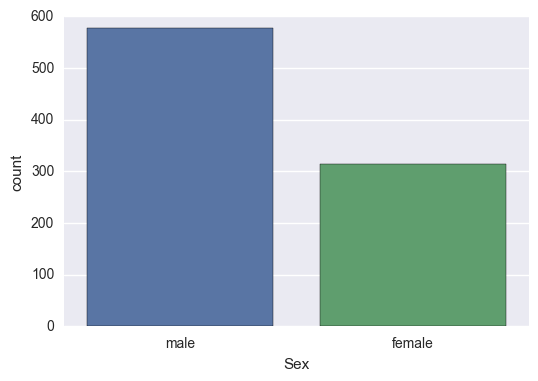

In [7]:
# First question : What type of people were on the Titanic?
sns.countplot(x='Sex',data=titanic_df)
# From the graph we are able to see we had a lot more males than females on the Titanic

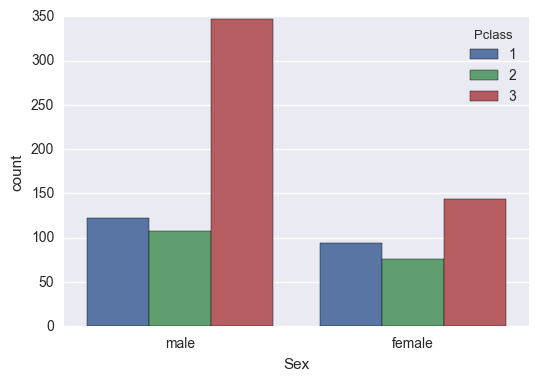

In [10]:
# With another look at the data when split into different classes, we are able to see there were more men
# even when we split the genders into different classes
sns.countplot(x='Sex',data=titanic_df,hue='Pclass')

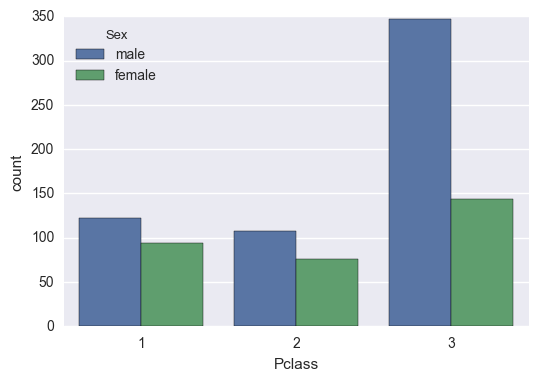

In [11]:
sns.countplot(x='Pclass',data=titanic_df,hue='Sex')

In [18]:
# Here I shall create a function that will split the passengers even further where children will be in their own column
def male_female_or_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex 

In [23]:
titanic_df['P_type'] = titanic_df[['Age','Sex']].apply(male_female_or_child,axis=1)

In [24]:
# Check if the column appendage was successful, and the first instance of child can be seen in the 7th row
titanic_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger,P_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,child


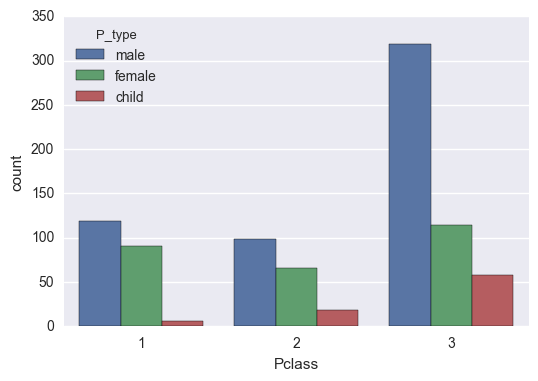

In [27]:
sns.countplot(x='Pclass',data=titanic_df,hue='P_type')

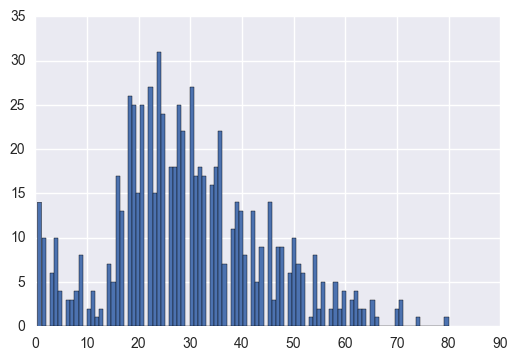

In [29]:
# When the data get partitioned into bins, we can observe that the main age group is from 20-40
titanic_df['Age'].hist(bins=100)

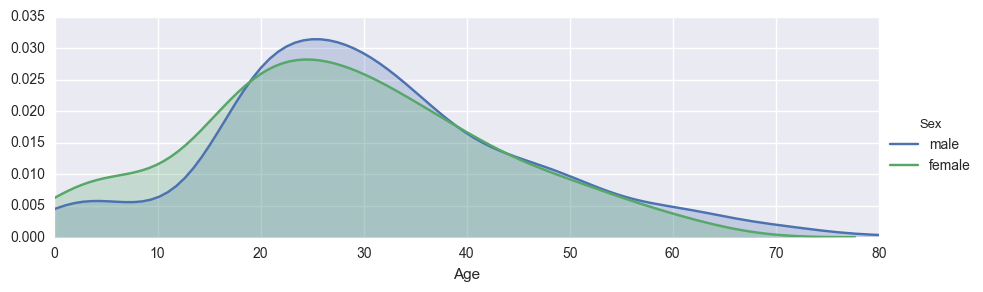

In [39]:
# This is another way to view the histogram with KDE plots
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=3)
fig.map(sns.kdeplot,'Age',shade=True)
# Determine the oldest age on the ship
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
# Add a legend for viewing purposes
fig.add_legend()

### 

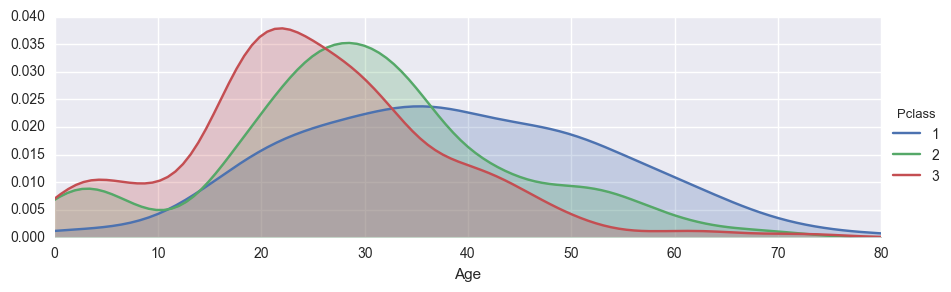

In [42]:
# This is another view of with the Pclass as our legend
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=3)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [43]:
# From all of our graphs we are able to identify the composition of the people who were on the Titanic via their
# age, classification of either male,female,child, and even the Pclass

In [44]:
# For the second question, I'd like to explore how the decks related to people's classes and their survival

In [45]:
# If we take a look at the data set, we can see for for the cabin column, there are a lot of NaN values. In order
# to make our analysis more meaningful, it's best to clean up the data a little bit by reorganizing the Cabin column
# to get more helpful insights about the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger,P_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,male


In [46]:
deck = titanic_df['Cabin'].dropna()

In [47]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

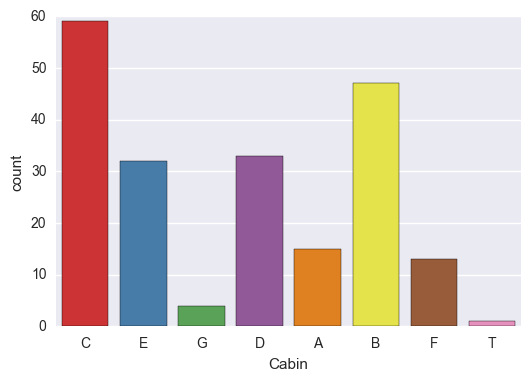

In [53]:
# Classify the decks by their first letter
cabin_levels = []

for levels in deck:
    cabin_levels.append(levels[0])

cabin_df = DataFrame(cabin_levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='Set1')

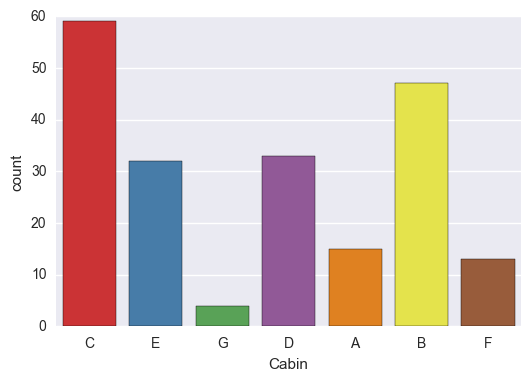

In [55]:
# Drop the T column because it is insignificant 
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin',data=cabin_df,palette='Set1')

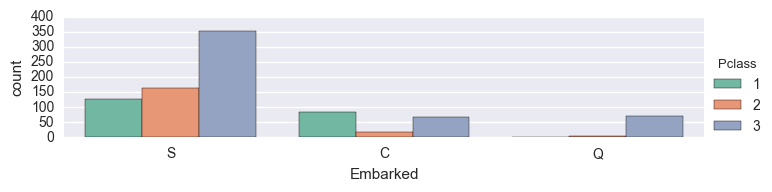

In [85]:
g = sns.factorplot('Embarked',hue="Pclass",data=titanic_df[titanic_df.Embarked.notnull()],
                   orient="h", size=2, aspect=3.5, palette="Set2" ,kind="count" )

In [86]:
# Looking at the graph is very interesting because we can reach many insight such as: most everyone people who embarked
# from Queenstown was booked for 3rd class, a major of people came from Southhampton. We may want to look deeper into 
# those particular cities to explore the demographics and income status of the people back during that time period.

In [88]:
# Now we should take a look at the people who were alone or with family, did the chance of surivial increase if you 
# came onboard with family or traveled by yourself?
titanic_df['Relationships'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Relationships']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Relationships, dtype: int64

In [89]:
titanic_df['Relationships'].loc[titanic_df['Relationships'] > 0] = 'With Family'
titanic_df['Relationships'].loc[titanic_df['Relationships'] == 0] = 'Alone'



//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [90]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger,P_type,Relationships
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,male,Alone


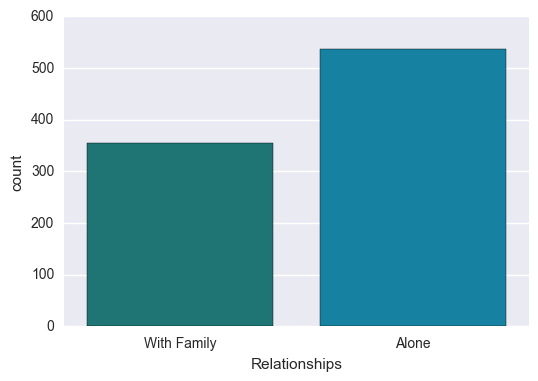

In [94]:
# So we see that a majority of people on the Titanic were by themselves
sns.countplot('Relationships',data=titanic_df,palette='winter_d')

In [103]:
titanic_df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare,family,Family
Pclass,,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,0.773148,0.773148
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,0.782609,0.782609
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,1.008147,1.008147


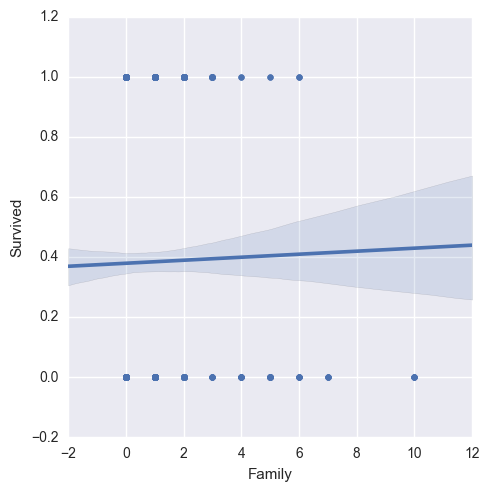

In [104]:
# Here we see that a majority of the people who typically had family, the split is about a 60/40 for surivial with 
# family. We can see that even people who were alone survived, but also some weren't saved
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']
sns.lmplot('Family','Survived',data=titanic_df)

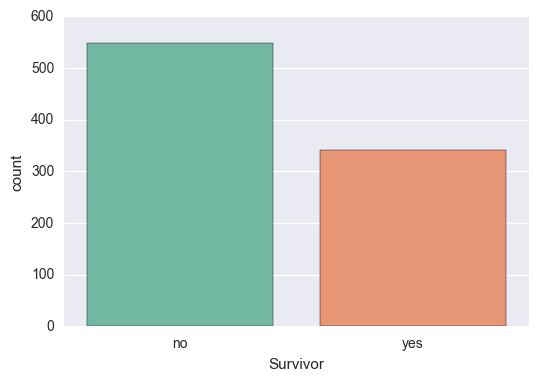

In [105]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
sns.countplot('Survivor',data=titanic_df,palette='Set2')

In [106]:
# From the graph above, we see more people perished than survived.
titanic_df.describe()
# Henceforth, we look at the idea that people of higher status survived compared to people of lower class

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family,Family
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,10.000000


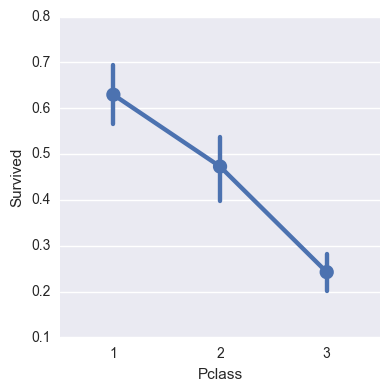

In [107]:
sns.factorplot('Pclass','Survived',data=titanic_df)

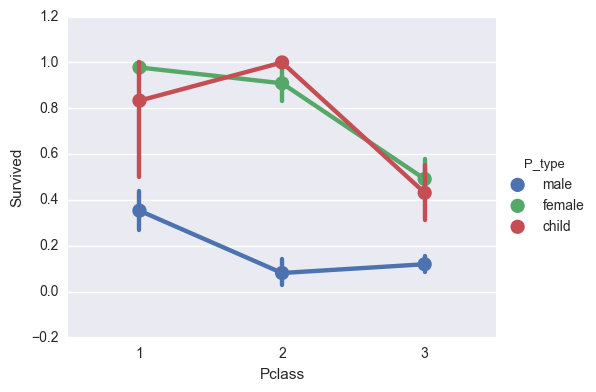

In [113]:
# From the graph above, it is clear that the survival rate for the 3rd class were significantly lower, but there needs
# to be a more in-depth look. A possible factor could have been that many men we in the 3rd class, so to solve this
# I take a look at the graph again but looking at a different hue for the factorplot
sns.factorplot('Pclass','Survived',data=titanic_df,hue='P_type',aspect=1.3)

In [114]:
# Now this graph above gives a better understanding that typically, a high percentage of children survived, while a majority 
# of the men perished, but from my previous graphs, it is evident that being a male regardless of class did not make
# a big decision that night, but that shouldn't hinder the analysis. We shall proceed with looking at how age played
# a factor if it did

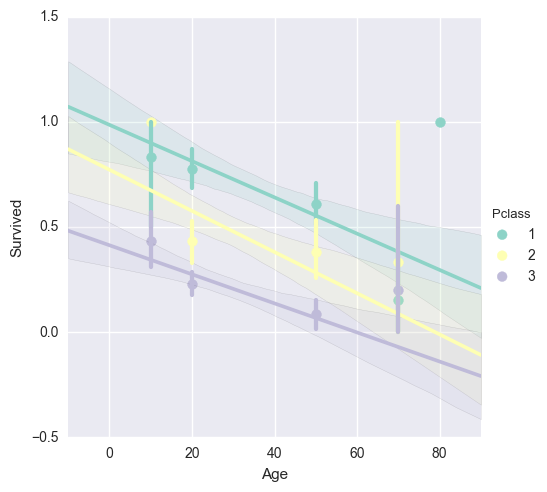

In [119]:
age_groups = [10,20,50,70,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='Set3',x_bins=age_groups)

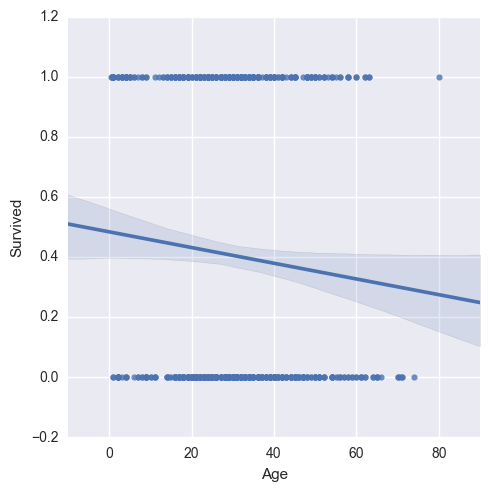

In [121]:
# From the graph, we see that older people, regardless of class did not ensure much survival. The safety boats were
# reserved more for families, in particular females and children. 
sns.lmplot('Age','Survived',data=titanic_df)

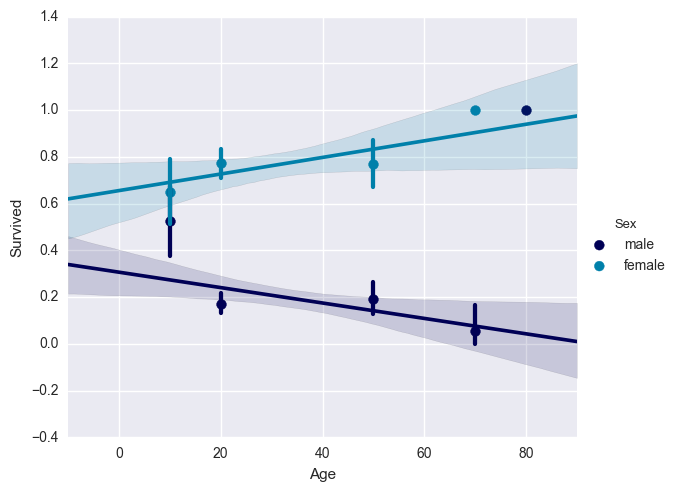

In [125]:
# Here, I shall take a deeper look of how age and gender affected the survival 
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='ocean',x_bins=age_groups,aspect=1.2)

In [126]:
# As expected, females were more likely to survive. But lastly I shall take a look at how family affected survival

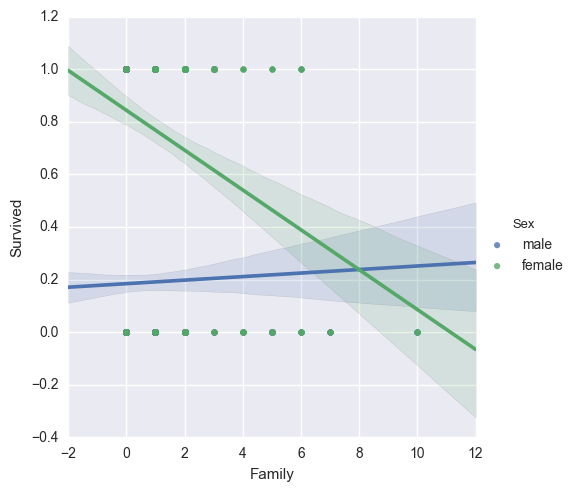

In [128]:
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']
sns.lmplot('Family','Survived',data=titanic_df,hue='Sex')

In [ ]:
# Sadly, from all of the graphs that are above, it seems as if being a male during the Titanic's maiden voyage was
# purely bad luck. Being a male, did not ensure much survival during this time, but there is definitely correlation
# for having a family and gender. Females had a higher chance of survival. Ultimately, I found the once factor that 
# turned no blind eye was: age. Passengers who were older had less chance of survival. 